# Preparing for Your Proposal
## Which client/dataset did you select and why?
I have chosen the NYT Covid19(20) dataset, I think it will be a good topic to analyze. The data are obtained from the following repository `https://github.com/nytimes/covid-19-data`

## Describe the steps you took to import and clean the data.
I used Python 3.11 on Jupyter notebook to import and clean the dataset. The dataset is in csv format, so I used the pandas library to read the `us-counties-2020.csv` file. Since the dataset contains information on all US states, I will limit the scope of my project to the most important state (California, Washington DC, New York and Florida).

## Perform initial exploration of data and provide some screenshots or display some stats of the data you are looking at.

  1. Import and clean data

In [5]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [6]:
data = pd.read_csv('us-counties-2020.csv')
states = ['California', 'New York', 'Washington', 'Florida']
clean_data = data[data['state'].isin(states)]

In [7]:
tabla = tabulate(clean_data.head(10), headers='keys', tablefmt='psql')
print(tabla)

+----+------------+-------------+------------+--------+---------+----------+
|    | date       | county      | state      |   fips |   cases |   deaths |
|----+------------+-------------+------------+--------+---------+----------|
|  0 | 2020-01-21 | Snohomish   | Washington |  53061 |       1 |        0 |
|  1 | 2020-01-22 | Snohomish   | Washington |  53061 |       1 |        0 |
|  2 | 2020-01-23 | Snohomish   | Washington |  53061 |       1 |        0 |
|  4 | 2020-01-24 | Snohomish   | Washington |  53061 |       1 |        0 |
|  5 | 2020-01-25 | Orange      | California |   6059 |       1 |        0 |
|  7 | 2020-01-25 | Snohomish   | Washington |  53061 |       1 |        0 |
|  9 | 2020-01-26 | Los Angeles | California |   6037 |       1 |        0 |
| 10 | 2020-01-26 | Orange      | California |   6059 |       1 |        0 |
| 12 | 2020-01-26 | Snohomish   | Washington |  53061 |       1 |        0 |
| 14 | 2020-01-27 | Los Angeles | California |   6037 |       1 |        0 |

  2. Profiling and understanding the data, showing total cases per month

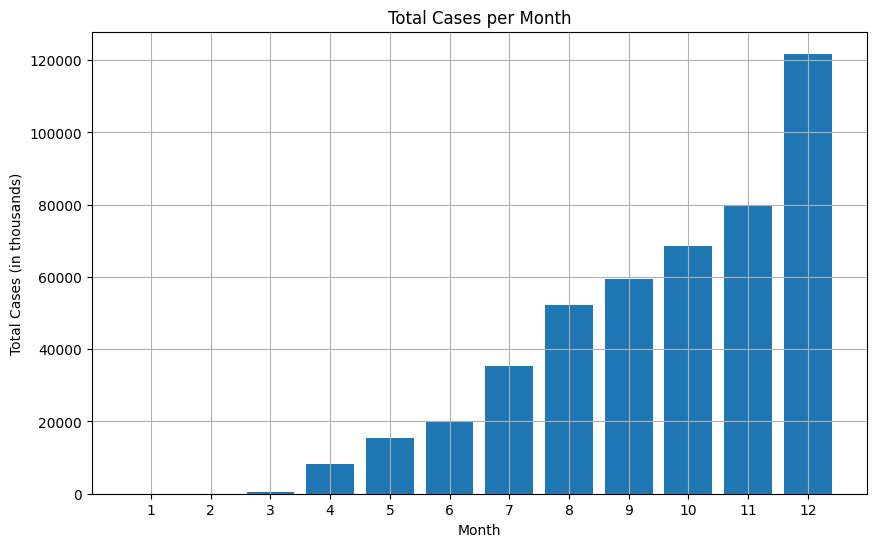

In [8]:
cases_per_date = clean_data.groupby('date')['cases'].sum()
cases_per_month = cases_per_date.copy()
cases_per_month.index = pd.to_datetime(cases_per_month.index)
cases_per_month.index = cases_per_month.index.month
cases_per_month = cases_per_month.groupby(cases_per_month.index).sum()
cases_per_month = cases_per_month / 1000

plt.figure(figsize=(10, 6))
plt.bar(cases_per_month.index, cases_per_month.values)
plt.title('Total Cases per Month')
plt.xlabel('Month')
plt.ylabel('Total Cases (in thousands)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

  3. Find total cases and percentage by state

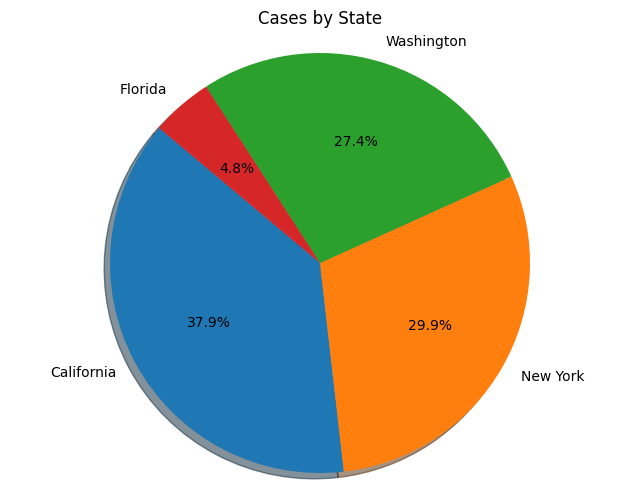

In [9]:
total = clean_data['cases'].sum()
cases_by_state = clean_data.groupby('state')['cases'].sum().values

plt.figure(figsize=(8, 6))
plt.pie(cases_by_state, labels=states, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Cases by State')
plt.axis('equal')
plt.show()

## Create an ERD or proposed ERD to show the relationships of the data you are exploring.

![ERD](ERD.png)


# Develop Project Proposal

## Description

This research project aims to analyze COVID-19 data, including information on date, county, state, FIPS codes, cases, and deaths. The objective is to investigate specific aspects related to the spread of the virus and its impact on sectors near the most affected counties.

## Questions

1. When did covirus cases start growing at an accelerated rate?
2. Were the sectors near the counties with the highest covid cases affected by these?
3. Did the most affected counties manage to stabilize infections?

## Hypothesis

1. COVID-19 cases began growing at an accelerated rate in a specific time period, indicating a significant increase in transmission.
2. Sectors near counties with the highest COVID-19 cases experienced notable disruptions and adverse effects due to the pandemic.
3. The most affected counties implemented measures that successfully stabilized the number of COVID-19 infections over time.

## Approach

For Question 1, conduct a time series analysis on the COVID-19 cases to identify the specific period when the growth rate increased significantly. This analysis will involve examining the rate of change in cases over time and identifying any inflection points or sudden spikes in the data.

For Question 2, analyze the proximity of sectors (such as healthcare, education, tourism, etc.) to the counties with the highest COVID-19 cases. Investigate any observable impacts on these sectors by considering indicators such as business closures, employment rates, and economic downturns.

For Question 3, analyze the trends in COVID-19 cases for the most affected counties over time. Examine the implementation of various interventions, such as social distancing measures, testing and tracing strategies, and vaccination campaigns, to evaluate their impact on stabilizing the number of infections.